# 2. 가장 많이 팔린 아이템 확인하기
### 학습 목표 
   - 아이템별 지표 확인하기
   - 시간별 지역별 판매 지표 확인하기

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns #seaborn : matplotlib에서 파생된 라이브러리로, 좀 더 풍부한 기능을 가진다. 
COLORS = sns.color_palette()

%matplotlib inline

### 1. 데이터 불러오기 ( 정제된 데이터 사용)

In [4]:
dtypes = {
    'UnitPrice' : np.float32,
    'CustomerID' : np.int32,
    'Quantity' : np.int32
}

retail = pd.read_csv('/Users/jeonghyeonjeong/for github/머신러닝_데이터분석_dataset/shoppingmall_data/OnlineRetailClean.csv')
retail.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34


### 2. 추가 전처리
#### 1) 12/1/2010 8:26	이런 식으로 되어있는 날짜 표기를
문자열로 로딩하는 것 보다 date/datetime 타입으로 로딩하는 것이 분석에 용이하다

pandas의 함수 중 to_datetime 사용

In [6]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], infer_datetime_format=True)

In [7]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 10 columns):
Unnamed: 0       397884 non-null int64
InvoiceNo        397884 non-null int64
StockCode        397884 non-null object
Description      397884 non-null object
Quantity         397884 non-null int64
InvoiceDate      397884 non-null datetime64[ns]
UnitPrice        397884 non-null float64
CustomerID       397884 non-null int64
Country          397884 non-null object
CheckoutPrice    397884 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 30.4+ MB


### 3. 본격 분석 시작 - 현상파악 
    - 현상파악이 선행 되어야지 이를 바탕으로 가설을 세우고 가설을 검증해 나가는 단계로 이어질 수 있다. 
#### 1) 전체 매출

In [9]:
total_revenue = retail['CheckoutPrice'].sum()
total_revenue

8911407.904

#### 2) 국가별 매출

In [17]:
#일단 국가별로 그룹을 지어야 함
country_revenue = retail.groupby('Country').sum()['CheckoutPrice'].sort_values()
country_revenue
#비율도 구할 수 있음
ratio = country_revenue/total_revenue
ratio

Country
Saudi Arabia            0.000016
Bahrain                 0.000062
Czech Republic          0.000093
RSA                     0.000112
Brazil                  0.000128
European Community      0.000146
Lithuania               0.000186
Lebanon                 0.000190
United Arab Emirates    0.000213
Unspecified             0.000299
Malta                   0.000306
USA                     0.000402
Canada                  0.000411
Iceland                 0.000484
Greece                  0.000534
Israel                  0.000810
Poland                  0.000823
Austria                 0.001144
Cyprus                  0.001525
Italy                   0.001962
Denmark                 0.002127
Channel Islands         0.002295
Singapore               0.002388
Finland                 0.002530
Portugal                0.003752
Norway                  0.004058
Japan                   0.004199
Sweden                  0.004307
Belgium                 0.004623
Switzerland             0.006334
Sp

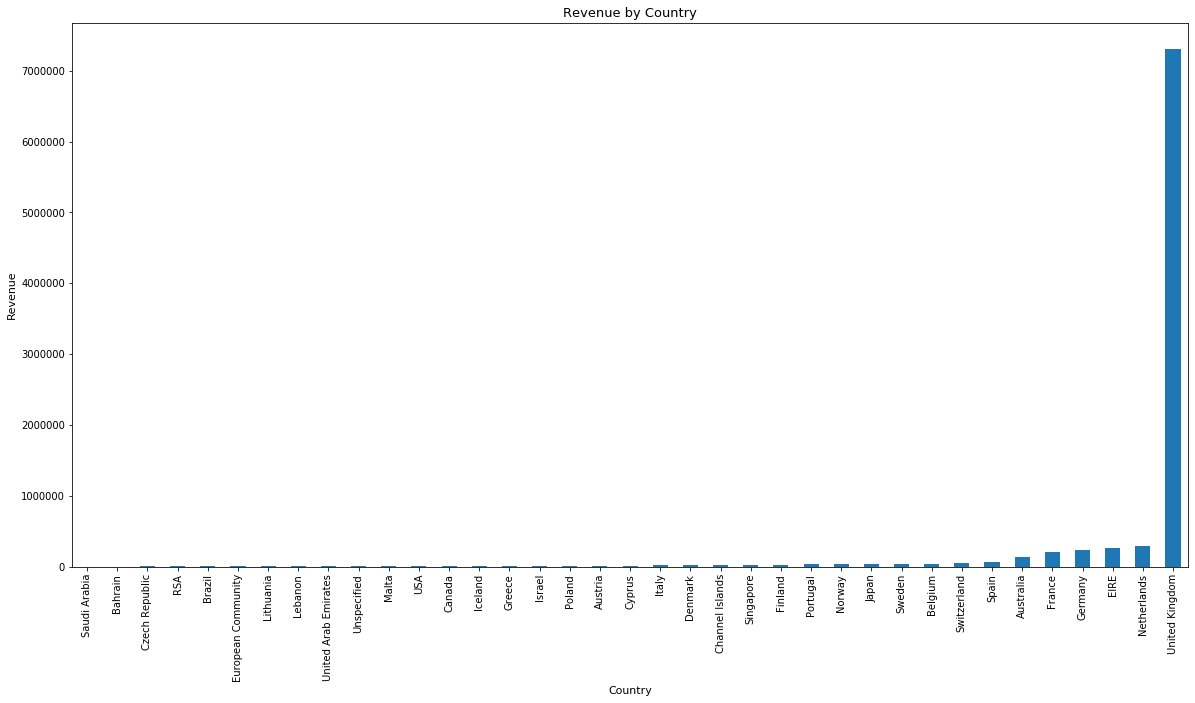

In [31]:
# 그래프로 위의 결과 시각화
country_revenue_Graph = country_revenue.plot(kind = 'bar', color = COLORS[-1], figsize =(20,20))
country_revenue_Graph.set_xlabel('Country', fontsize=11)
country_revenue_Graph.set_ylabel('Revenue', fontsize=11)
country_revenue_Graph.set_title('Revenue by Country', fontsize=13)

#앞으로도 시각화하는 함수 계속 쓸 것이기 때문에 함수화하기
def plot_bar(dataframe, xlabel, ylabel, title, color=COLORS[0] ,figsize=(20,10), rotation=45):
    dataframe = dataframe.plot(kind = 'bar', color = color, figsize =figsize)
    dataframe.set_xlabel(xlabel, fontsize=11)
    dataframe.set_ylabel(ylabel, fontsize=11)
    dataframe.set_title(title, fontsize=13)
    #dataframe.set_xticklabels(labels=dataframe.index, rotation=rotation)
    
    
plot_bar(country_revenue, 'Country', 'Revenue', 'Revenue by Country')

#### 3) 월별 매출

In [20]:
retail.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [25]:
 #InvoiceDate에서 '월' 정보만 뽑아야 한다. 그 후 월 정보만 뽑아서 grouping
#월 정보만 뽑는 함수
def extract_month(date):
    month = str(date.month)
    if date.month <10:
        month = '0'+month
    return str(date.year)+month


monthly_revenue = retail.set_index('InvoiceDate').groupby(extract_month).sum()['CheckoutPrice']
monthly_revenue

201012     572713.890
201101     569445.040
201102     447137.350
201103     595500.760
201104     469200.361
201105     678594.560
201106     661213.690
201107     600091.011
201108     645343.900
201109     952838.382
201110    1039318.790
201111    1161817.380
201112     518192.790
Name: CheckoutPrice, dtype: float64

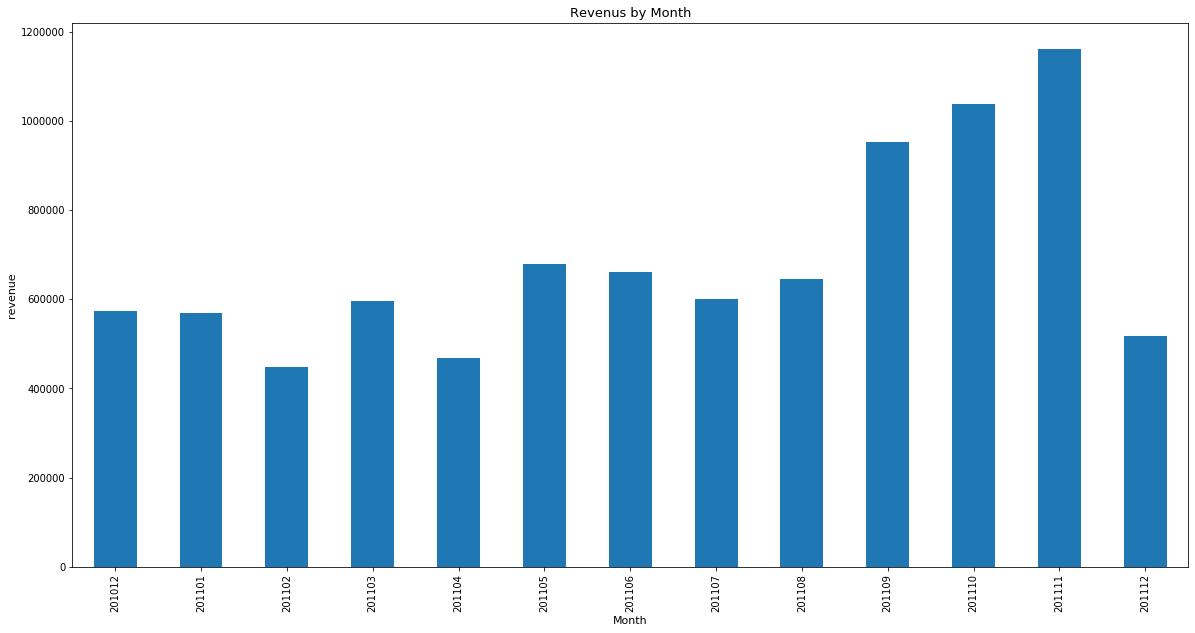

In [32]:
#시각화
plot_bar(monthly_revenue, 'Month', 'revenue', 'Revenus by Month')

#### 4) 요일별 매출

In [35]:
Daily_revenue = retail.set_index('InvoiceDate').groupby(lambda date:date.dayofweek).sum()['CheckoutPrice']
Daily_revenue

0    1367146.411
1    1700634.631
2    1588336.170
3    1976859.070
4    1485917.401
6     792514.221
Name: CheckoutPrice, dtype: float64

 5(토요일)에는 주문데이터가 없을 을 알 수 있다. 

/Users/jeonghyeonjeong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

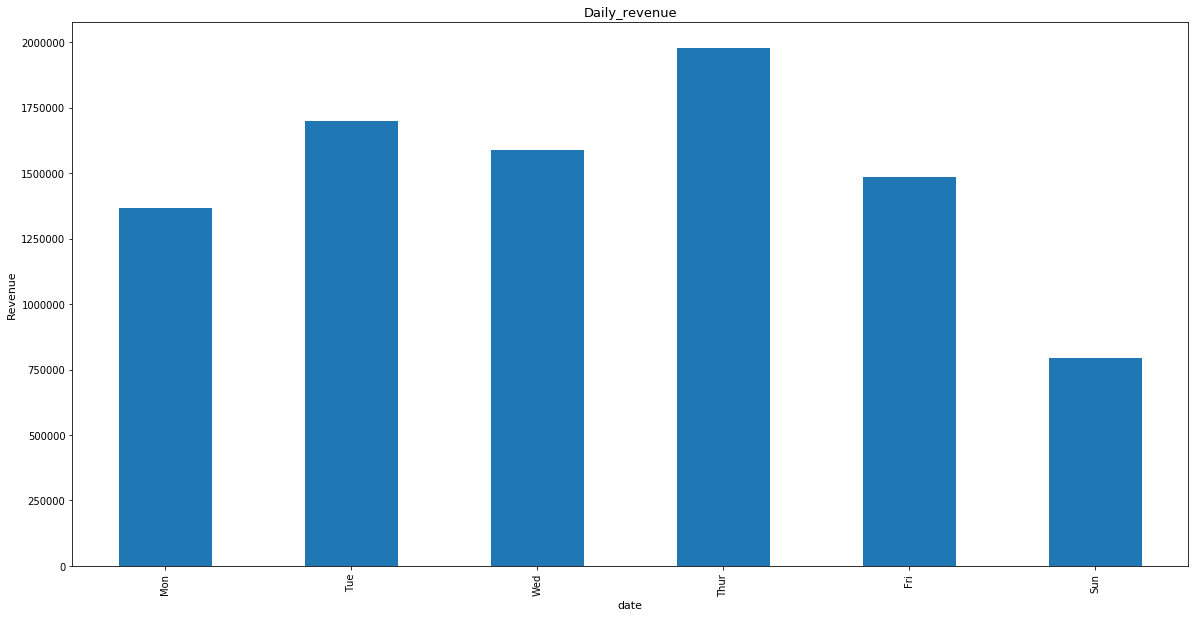

In [42]:
plot_bar(Daily_revenue, 'date', 'Revenue', 'Daily_revenue')

#0123456 -> 월화수목금토일 로 바꾸기
DAY_OF_WEEK = np.array(['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
Daily_revenue.index = DAY_OF_WEEK[Daily_revenue.index]
plot_bar(Daily_revenue, 'date', 'Revenue', 'Daily_revenue')

#### 5)시간별 매출 

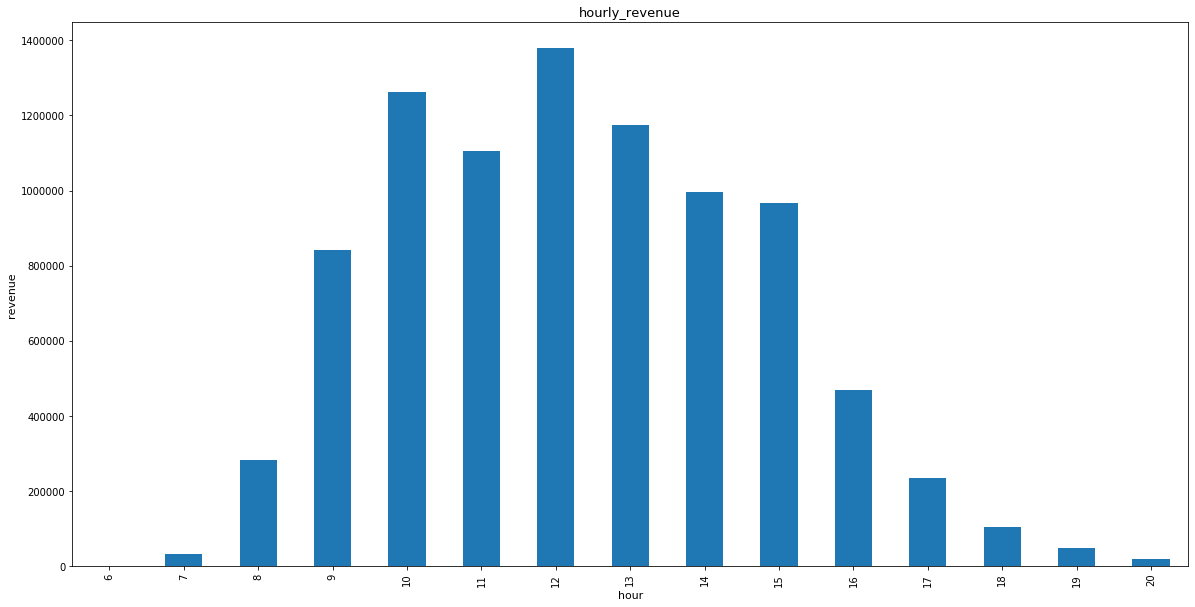

In [45]:
hourly_revenue = retail.set_index('InvoiceDate').groupby(lambda date:date.hour).sum()['CheckoutPrice']
plot_bar(hourly_revenue, 'hour', 'revenue', 'hourly_revenue')

#### 지금까지 현실 파악을 해 본 결과를 정리해 보면, (매출 데이터로부터의 insight)
1. 국가별 매출
전체 82%의 매출이 UK에서 발생
2. 월별 매출
11년도의 가장 많은 주문이 발새한 달은 11월 (12월을 초반만 반영되어서 이는 보충이 필요)
> 블랙프라이데이, 사이버먼데이, 크리스마스 휴일등을 고려하면 11월, 12월 매출이 가장 높을 것이라 예상 할 수 있음. 
3. 요일별 매출
일주일중 목요일까지는 성장세르 보이다가, 이후로 하락(토요일에는 주문이 없음)
> 토요일엔 왜 0인지 파악이 필요
4. 시간별 매출
7시를 시작으로 12시까지 증가세르 보이고, 15시까지 하락, 17시까지 급락. 


 #### 6) 제품별 분석
 - Top10 판매 제품
 - Top10 매출 제품 

In [48]:
#Top10 판매 제품
#'Quantity'를 기준으로 판매 제품을 group화 하고 합계를 정렬하여 top10만 보겠다. 
top_selling = retail.groupby('StockCode').sum()['Quantity'].sort_values(ascending=False)[:3]
top_selling

StockCode
23843     80995
23166     77916
84077     54415
22197     49183
85099B    46181
85123A    36782
84879     35362
21212     33693
23084     27202
22492     26076
Name: Quantity, dtype: int64

In [50]:
#Top10 매출 제품
#'CheckoutPrice'를 준으로 판매 제품을 group화 하고 합계를 정렬하여 top10만 보겠다. 
top_value = retail.groupby('StockCode').sum()['CheckoutPrice'].sort_values(ascending=False)[:10]
top_value

StockCode
23843     168469.60
22423     142592.95
85123A    100603.50
85099B     85220.78
23166      81416.73
POST       77803.96
47566      68844.33
84879      56580.34
M          53779.93
23084      51346.20
Name: CheckoutPrice, dtype: float64

#### 7) 앞의 결과를 합하여 insight도출
- top3 아이템의 월별 판매량 추이

In [58]:

top3_MonthlySelling = retail.set_index('InvoiceDate').groupby(['StockCode', extract_month]).sum()[['Quantity', 'CheckoutPrice']]
top3_selling = top_selling[:3]
top3_MonthlySelling.loc[top3_selling.index]                                                           
                                                             
                                                             
                                                           

Quantity  CheckoutPrice
StockCode                                
23166     201101     74215       77183.60
          201105       792         869.04
          201106       391         458.51
          201107       718         826.94
          201108       405         486.09
          201109       342         397.26
          201110       235         283.67
          201111       631         708.11
          201112       187         203.51
23843     201112     80995      168469.60
84077     201012      5139        1150.47
          201101      1488         385.44
          201102      3457         795.17
          201103      3888         943.20
          201104     10224        2281.44
          201105      4944        1249.44
          201106      1920         533.76
          201107      3600         982.56
          201108      2256         654.24
          201109      3462         985.70
          201110      8174        1953.98
          201111      4500        1294.20
          201112      1363         376.65

In [ ]:
plot_bar(top3_MonthlySelling['CheckoutPrice'], 'Product/Month', 'Revenue', 'Revenue of top3')